In [1]:
import pandas as pd 

In [9]:
# Read the data from the CSV file
data = pd.read_csv("h3.csv")

# Convert to DataFrame
df = pd.DataFrame(data)

# Ensure the 'Covariate' column is in the DataFrame
if 'Covariate' in df.columns:
    df = df.set_index('Covariate')

# Reorder the columns based on the specified order
order = [
    'team_size',
    'tenure_avg',
    'tenure_disparity',
    'gender_avg',
    'gender_disparity',
    'team_closure',
    'team_exact_repetition',
    'team_sub_rep_1',
    'team_sub_rep_2',
    'team_sub_rep_3',
    'team_sub_rep_4',
    'prior_success_exact',
    'prior_success_1',
    'prior_success_2',
    'prior_success_3',
    'prior_success_4',
    'performance_disparity',
    'mechanic_size',
    'exact_repetition',
    'team_mechanic_closure',
    'mechanics_exact_repetition',
    'mechanic_sub_rep_1',
    'mechanic_sub_rep_2',
    'mechanic_sub_rep_3',
    'mechanic_sub_rep_4',
    'mechanic_sub_rep_5',
    'team_mechanic_sub_rep_1_1',
    'team_mechanic_sub_rep_1_2',
    'team_mechanic_sub_rep_1_3',
    'team_mechanic_sub_rep_2_1',
    'team_mechanic_sub_rep_2_2',
    'team_mechanic_sub_rep_2_3',
    'team_mechanic_sub_rep_3_1',
    'team_mechanic_sub_rep_3_2',
    'team_mechanic_sub_rep_3_3',
    'portfolio_size_avg',
    'portfolio_size_heterogeneity',
]

# Reorder the DataFrame columns
df = df.loc[order].reset_index()

/var/folders/t0/lg3jmzv573q7n1cv7kt891y40000gn/T/ipykernel_80998/1357885285.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.86, 0.95])  # Adjusted to leave space for the title


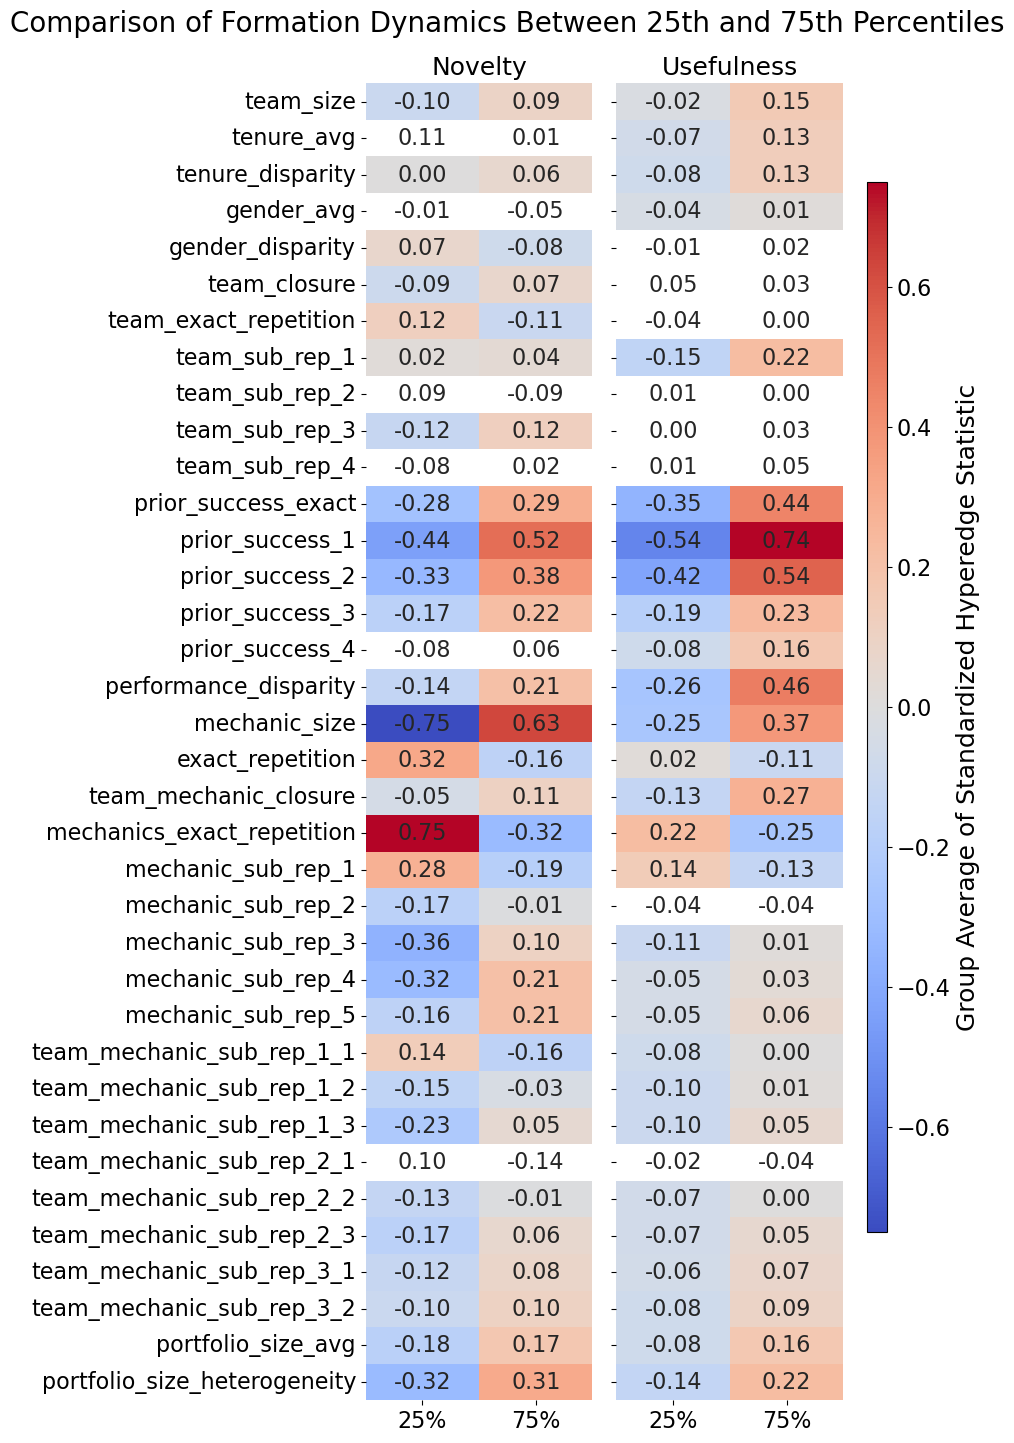

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

# Set the global font size
plt.rcParams.update({'font.size': 16})

# Function to determine if a value is significant
def is_significant(diff):
    return '*' in diff

# Create masks for significant values
novelty_significant_mask = df['Difference_novelty'].apply(is_significant).values
usefulness_significant_mask = df['Difference_usefulness'].apply(is_significant).values

# Prepare data for heatmaps
novelty_data = df.set_index('Covariate')[['Bottom_25_novelty','Top_25_novelty',]]
usefulness_data = df.set_index('Covariate')[['Bottom_25_usefulness','Top_25_usefulness',]]

# Create a mask with the same shape as the DataFrame columns being masked
novelty_mask = np.tile(novelty_significant_mask[:, np.newaxis], (1, novelty_data.shape[1]))
usefulness_mask = np.tile(usefulness_significant_mask[:, np.newaxis], (1, usefulness_data.shape[1]))

# Apply masks to create masked arrays
novelty_masked = novelty_data.mask(~novelty_mask)
usefulness_masked = usefulness_data.mask(~usefulness_mask)

# Rename columns for clarity in the heatmap
cols = ['25%', '75%']
novelty_data.columns = cols
usefulness_data.columns = cols
novelty_masked.columns = cols
usefulness_masked.columns = cols

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 15), sharey=True)

# Create a custom colormap with only white color
white_cmap = ListedColormap(['white'])

# Heatmap for Novelty
sns.heatmap(novelty_data, annot=True, fmt=".2f", cmap=white_cmap, center=0, ax=axes[0], cbar=False, annot_kws={"size": 16})
sns.heatmap(novelty_masked, annot=False, cmap='coolwarm', center=0, ax=axes[0], cbar=False, mask=~novelty_mask)
axes[0].set_title('Novelty', fontsize=18)
axes[0].set_ylabel('', fontsize=16)

# Heatmap for Usefulness
sns.heatmap(usefulness_data, annot=True, fmt=".2f", cmap=white_cmap, center=0, ax=axes[1], cbar=False, annot_kws={"size": 16})
sns.heatmap(usefulness_masked, annot=False, cmap='coolwarm', center=0, ax=axes[1], cbar=False, mask=~usefulness_mask)
axes[1].set_title('Usefulness', fontsize=18)
axes[1].set_ylabel('', fontsize=16)

# Create a single colorbar for both heatmaps
cbar_ax = fig.add_axes([0.86, 0.15, 0.02, 0.7])  # Adjusted position for the colorbar
norm = plt.Normalize(min(novelty_data.min().min(), usefulness_data.min().min()), 
                     max(novelty_data.max().max(), usefulness_data.max().max()))
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)
cbar_ax.set_ylabel('Group Average of Standardized Hyperedge Statistic', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.86, 0.95])  # Adjusted to leave space for the title

# Set the main title
fig.suptitle("Comparison of Formation Dynamics Between 25th and 75th Percentiles", fontsize=20, y=.965)

# Save the plot as a PNG file
plt.savefig("h3.png", bbox_inches='tight')
plt.show()